In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
N = 22              # number of vehicles
L = 220.0           # road length [m]
d0 = 10.0           # desired spacing / safety buffer [m]
ell = 5.0           # effective vehicle length [m]
a = 3.0             # sensitivity coefficient [1/s]
v_max = 15.0        # free-flow speed [m/s]

# Simulation parameters
T = 100.0           # total simulation time [s]
dt = 0.1           # time step [s]
steps = int(T / dt)
t = np.linspace(0.0, T, steps + 1)

# Optimal velocity function from Bando et al.
def optimal_velocity(delta_x):
    return v_max * (np.tanh(delta_x - d0) + np.tanh(d0)) / (1.0 + np.tanh(d0))

# Initialize positions uniformly on the ring and add a small perturbation.
initial_spacing = L / N
rho = N / L  # vehicle density
x = np.zeros((steps + 1, N))
for i in range(N):
    x[0, i] = i * initial_spacing

# Initialize velocities using the optimal velocity for the initial spacing.
v = np.zeros((steps + 1, N))
headway0 = initial_spacing
v[0] = optimal_velocity(headway0)

for k in range(steps):
    headway = np.mod(np.roll(x[k], -1) - x[k], L)
    v_opt = optimal_velocity(headway)
    acc = a * (v_opt - v[k])
    v[k + 1] = v[k] + dt * acc
    x[k + 1] = (x[k] + dt * v[k + 1]) % L  # wrap around the ring


In [12]:
print(optimal_velocity(headway0))

7.499999984541349


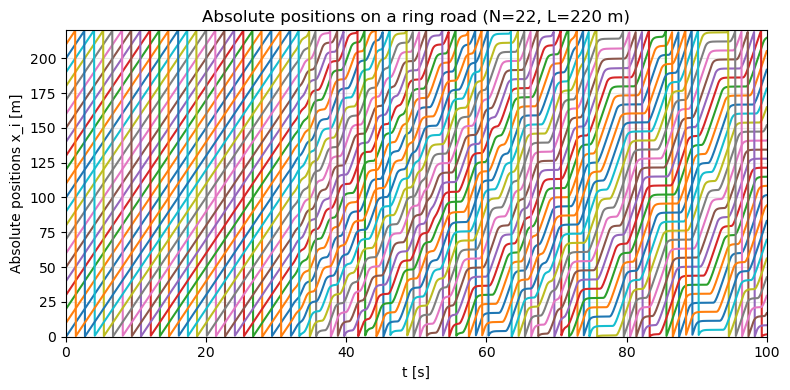

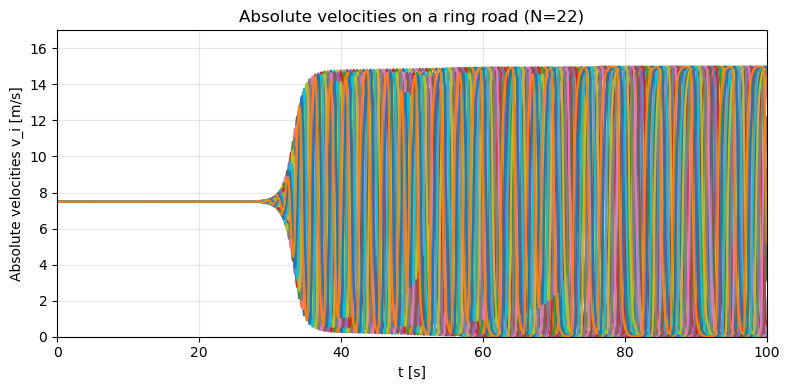

In [13]:
# Plot absolute positions
plt.figure(figsize=(8, 4))
for i in range(N):
    plt.plot(t, x[:, i])
plt.xlabel('t [s]')
plt.ylabel('Absolute positions x_i [m]')
plt.title('Absolute positions on a ring road (N=22, L=220 m)')
plt.xlim(0, T)
plt.ylim(0, L)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot absolute velocities
plt.figure(figsize=(8, 4))
for i in range(N):
    plt.plot(t, v[:, i])
plt.xlabel('t [s]')
plt.ylabel('Absolute velocities v_i [m/s]')
plt.title('Absolute velocities on a ring road (N=22)')
plt.xlim(0, T)
plt.ylim(0, v_max + 2)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()